In [ ]:
import os
os.listdir('data')

# Wage data introduced
All data is in the data directory. This data was downloaded from the ISLR and MASS R packages

所有数据都在数据目录中。这些数据是从 ISLR 和 MASS R 包下载的

In [ ]:
# Bring data into workspace and replicate plots 将数据带入工作区并复制图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_wage = pd.read_csv('/content/wage.csv')

In [ ]:
df_wage.head(10)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [ ]:
df_wage.info()
#返回了关于数据集的一些信息
#数据集中有3000行数据、每一列的名称和非空值数量、数据集的内存使用情况约为281.4KB
#每一列的数据类型（dtype）：其中有两列是浮点型（float64），两列是整数型（int64），八列是对象型（object）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.4+ KB


In [ ]:
#count：非空值数量、unique：唯一值数量、top：出现频率最高的值、freq：出现频率最高的值的频数
df_wage.describe(include=['object'])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


In [ ]:
# Look at all available plotting styles 返回了 matplotlib 中所有可用的绘图风格
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use("ggplot")#将绘图风格设置为 "ggplot"

In [ ]:
# need to reshape data to plot correctly
#将原始数据集 df_wage 中的 "education" 列的唯一值作为列，并将 "wage" 列的值填充到相应的位置上，从而创建了一个新的 DataFrame df_edu
df_edu = df_wage.pivot(columns='education', values='wage')

In [ ]:
df_edu.head(15)

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
0,75.043154,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,70.476020,NaN
2,NaN,NaN,130.982177,NaN,NaN
3,NaN,NaN,NaN,154.685293,NaN
4,NaN,75.043154,NaN,NaN,NaN
5,NaN,NaN,NaN,127.115744,NaN
6,NaN,NaN,169.528538,NaN,NaN
7,NaN,NaN,111.720849,NaN,NaN
8,NaN,NaN,118.884359,NaN,NaN
9,NaN,128.680488,NaN,NaN,NaN


In [ ]:
# importing statsmodels library to fit lowess curve through data
import statsmodels.api as sm

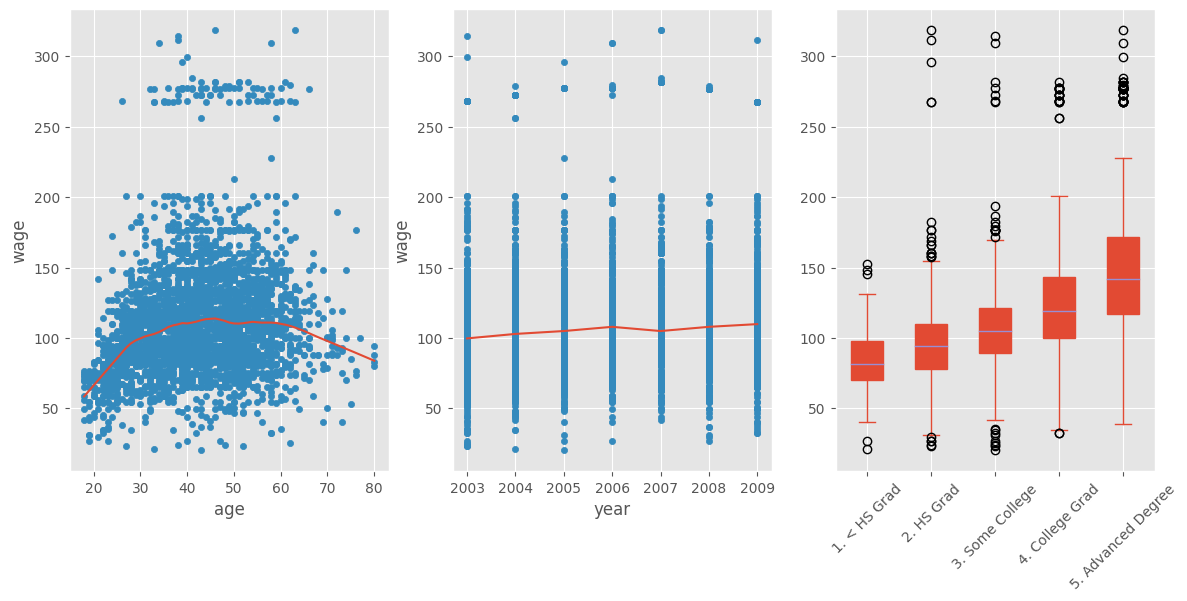

In [ ]:
#第一个子图显示了年龄（age）与工资（wage）之间的散点图，并使用局部加权回归拟合（LOESS）线来显示趋势
fig, ax = plt.subplots(1, 3, figsize=(14,6))
df_wage.plot.scatter('age', 'wage', ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1])
#第二个子图显示了年份（year）与工资（wage）之间的散点图，并添加了每年工资的中位数线
df_wage.plot.scatter('year', 'wage', ax=ax[1])
year_median = df_wage.groupby('year')['wage'].median()
ax[1].plot(year_median)
#第三个子图显示了不同教育程度（education）的工资分布情况，使用箱线图展示了工资的中位数、上下四分位数和异常值
boxplot = df_edu.plot.box(ax=ax[2], rot=45, patch_artist=True)
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_facecolor(color)

In [ ]:
import seaborn as sns

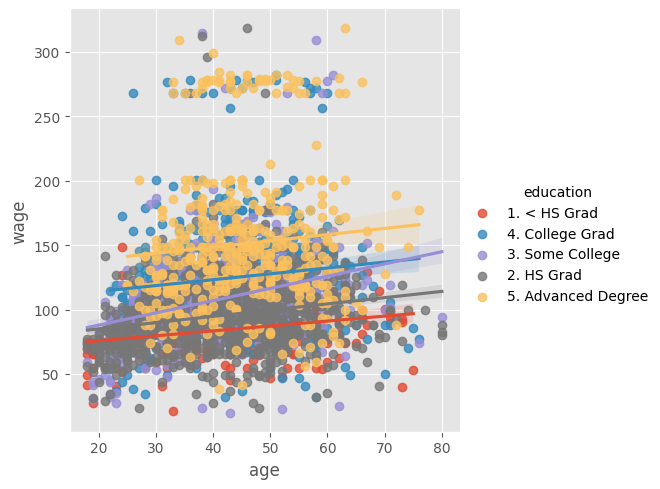

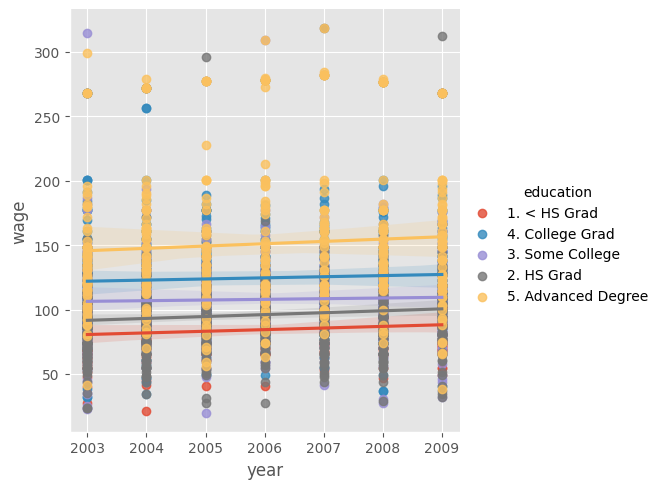

In [ ]:
# Similar plots to those above
#第一个图形显示了年龄与工资之间的散点图，并添加了用于拟合关系的线性回归线。每个教育程度都用不同的颜色表示
sns.lmplot(x='age', y='wage', data=df_wage, hue='education')
#第二个图形显示了年份与工资之间的散点图，并添加了用于拟合关系的线性回归线，并且提供了99.99%的置信区间。同样，每个教育程度都用不同的颜色表示。
sns.lmplot(x='year', y='wage', data=df_wage, ci=99.99, hue='education');

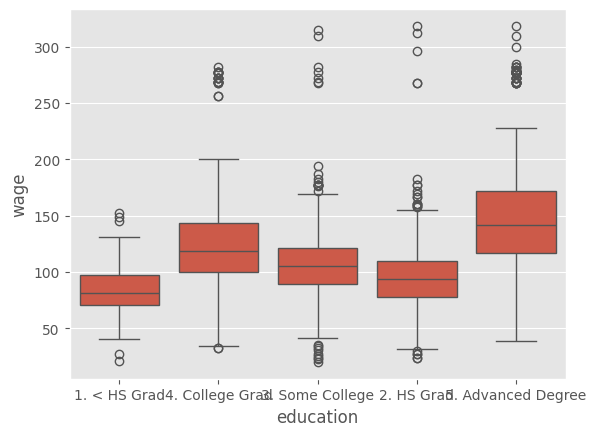

In [ ]:
#代码使用 seaborn 库中的 boxplot 函数创建了一个箱线图，用于显示不同教育程度（education）的工资（wage）分布情况
sns.boxplot(x='education', y='wage', data=df_wage);

In [ ]:
df1 = df_wage[['age', 'year', 'education', 'wage']]#创建了一个新的 DataFrame
df1.head()

,age,year,education,wage
0,18,2006,1. < HS Grad,75.043154
1,24,2004,4. College Grad,70.476020
2,45,2003,3. Some College,130.982177
3,43,2003,4. College Grad,154.685293
4,50,2005,2. HS Grad,75.043154


In [ ]:
df_melt = pd.melt(df1, id_vars=['education', 'wage'])

In [ ]:
df_melt.head()

,education,wage,variable,value
0,1. < HS Grad,75.043154,age,18
1,4. College Grad,70.476020,age,24
2,3. Some College,130.982177,age,45
3,4. College Grad,154.685293,age,43
4,2. HS Grad,75.043154,age,50


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
<ipython-input-18-6cbdc0e04ec1>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)


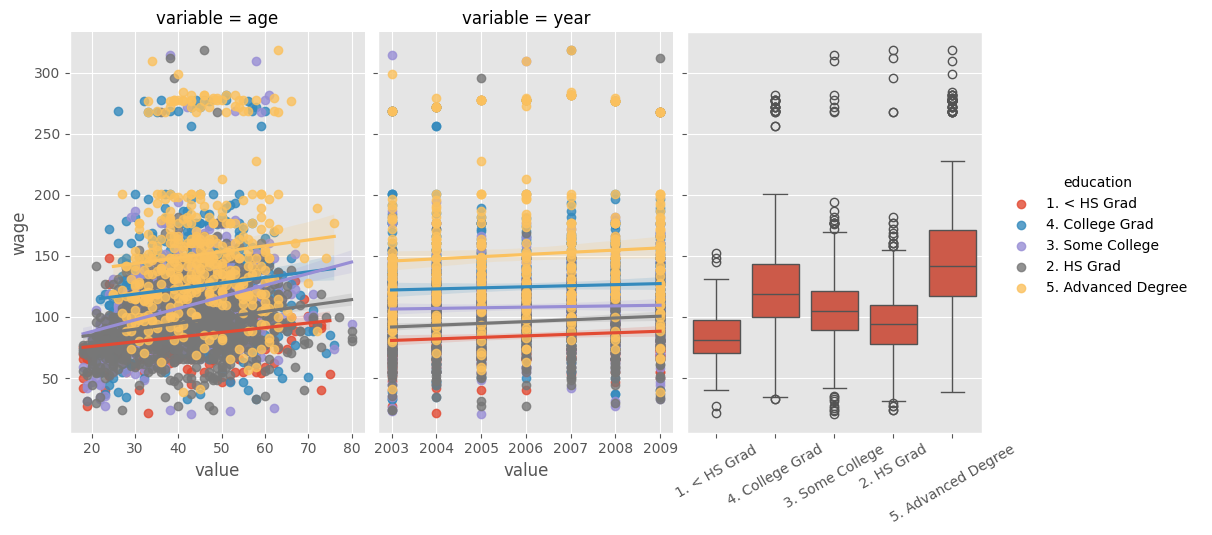

In [ ]:
#创建了一个 Seaborn 的网格图（seaborn_grid），包含了三个子图
seaborn_grid = sns.lmplot(x='value', y='wage', col='variable', hue='education', data=df_melt, sharex=False)
seaborn_grid.fig.set_figwidth(8)#网格图的宽度为8

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))

#去除了y轴刻度标签、旋转了x轴刻度标签、去除了y轴标签和x轴标签
sns.boxplot(x='education', y='wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])#调整了图例的位置

# Regression vs Classification 回归与分类


In [ ]:
df_smarket = pd.read_csv('/content/smarket.csv')

In [ ]:
df_smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [ ]:
# Put all lags in one column. Make 'Tidy' Data
#DataFrame df_smarket 进行重塑，将原来的宽格式数据转换为长格式数据
df_smarket_pivot = pd.melt(df_smarket,
              id_vars='Direction',
              value_vars=['Lag1', 'Lag2', 'Lag3'],
              var_name='Lag Type',
              value_name='Pct Change')
#id_vars='Direction'：表示保持 "Direction" 列不变，而将其余列作为需要重塑的变量
#value_vars=['Lag1', 'Lag2', 'Lag3']：指定了需要被转换的列
#var_name='Lag Type'：指定了新列的名称，用来表示之前的列名
#value_name='Pct Change'：指定了新列的名称，用来表示原来的值

In [ ]:
df_smarket_pivot.head()

,Direction,Lag Type,Pct Change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


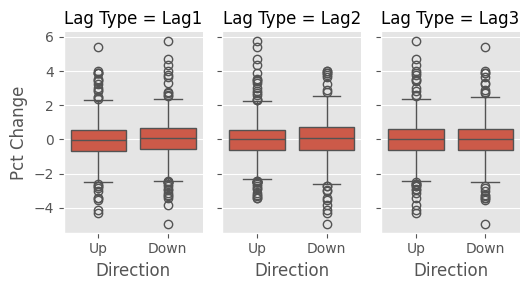

In [ ]:
g = sns.FacetGrid(df_smarket_pivot, col="Lag Type", aspect=.6)
g = g.map(sns.boxplot, "Direction", "Pct Change")

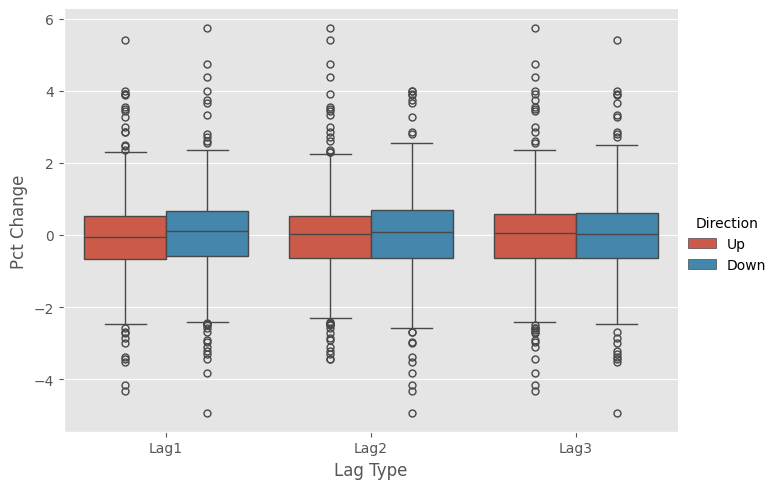

In [ ]:
sns.catplot(x="Lag Type", y="Pct Change", hue="Direction",data=df_smarket_pivot, kind="box", aspect=1.4)

# Clustering 聚类
No longer interested in prediction - looking to discover underlying similarities in the data
不再对预测感兴趣 - 寻求发现数据中潜在的相似性

In [ ]:
df_genes = pd.read_csv('/content/nci60_data.csv', index_col=0)

In [ ]:
df_genes.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [ ]:
#导入了 scikit-learn 库中的 PCA（主成分分析）模块，它用于执行主成分分析，一种常用的降维技术。
#PCA 可以将高维数据转换为低维数据，同时保留数据中的大部分信息，从而使得数据更容易可视化或用于其他分析任务
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(2)#降维到的目标维度为 2，二次元......?

In [ ]:
#降维操作，并将结果存储在一个新的 DataFrame df_genes_transformed 中，该 DataFrame 包含了两列，分别命名为 'PC1' 和 'PC2'
df_genes_transformed = pd.DataFrame(pca.fit_transform(df_genes), columns=['PC1', 'PC2'])

In [ ]:
#KMeans 是一种常用的聚类算法，它将数据分成 K 个不同的簇，每个簇的中心点代表着簇内样本的平均值，使得簇内的样本相似度较高，而不同簇的样本相似度较低
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(4)#簇的数量为 4

In [ ]:
kmeans.fit(df_genes_transformed)#KMeans.fit() 方法将会对数据进行聚类，将数据分配到最近的簇中，并计算出每个簇的中心点。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
#这些标签是从0到K-1的整数，表示每个样本所属的簇的编号
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
#将 KMeans 聚类的结果，即每个样本所属的簇的标签，添加到了 DataFrame df_genes_transformed 中，命名为 'cluster' 列
df_genes_transformed['cluster'] = kmeans.labels_

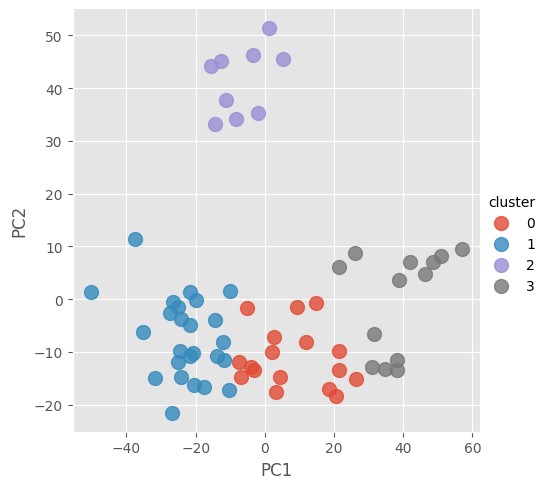

In [ ]:
#使用 seaborn 库的 lmplot 函数绘制了一个散点图，横轴为 'PC1'，纵轴为 'PC2'，并根据每个样本所属的簇的标签进行了着色
#x='PC1' 和 y='PC2'：分别指定了横轴和纵轴上要显示的变量
#fit_reg=False：表示不要绘制回归线、hue='cluster'：根据 'cluster' 列的值对数据进行分组，不同的分组使用不同的颜色进行区分
#scatter_kws={"marker": "D", "s": 100}：指定了散点图的样式，将散点图的形状设置为菱形（"D"）并设置散点的大小为 100
sns.lmplot(x='PC1', y='PC2', data=df_genes_transformed, fit_reg=False, hue='cluster',
           scatter_kws={"marker": "D", "s": 100})

## Advertising Data
The advertising data consists of product sales from 200 markets and their associated tv, radio, and newspaper advertising budgets. What kind of relationship can be seen between advertising budget and sales
#广告数据包括 200 个市场的产品销量及其相关的电视、广播和报纸广告预算。广告预算与销售额之间存在怎样的关系

In [ ]:
df_adv = pd.read_csv('/content/Advertising.csv')
df_adv.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
#variable 列是原始数据集中选择的列的名称，表示了广告投入的类型（电视、广播、报纸）
df_adv_new = pd.melt(df_adv, value_vars=['TV', 'Radio', 'Newspaper'], id_vars='Sales', value_name='adv_budget')
df_adv_new.head(10)

,Sales,variable,adv_budget
0,22.1,TV,230.1
1,10.4,TV,44.5
2,9.3,TV,17.2
3,18.5,TV,151.5
4,12.9,TV,180.8
5,7.2,TV,8.7
6,11.8,TV,57.5
7,13.2,TV,120.2
8,4.8,TV,8.6
9,10.6,TV,199.8


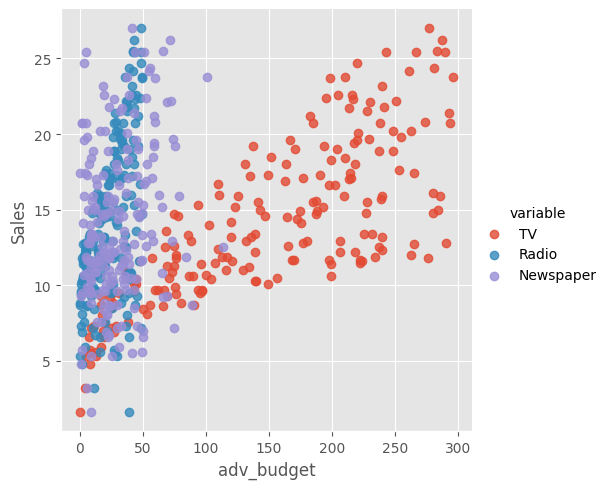

In [ ]:
#横轴是广告投入（'adv_budget'），纵轴是销售额（'Sales'），并根据广告投入的类型（'variable'）进行了着色，fit_reg=False：表示不要绘制回归线
sns.lmplot(x='adv_budget', y='Sales', data=df_adv_new, hue='variable', fit_reg=False);

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


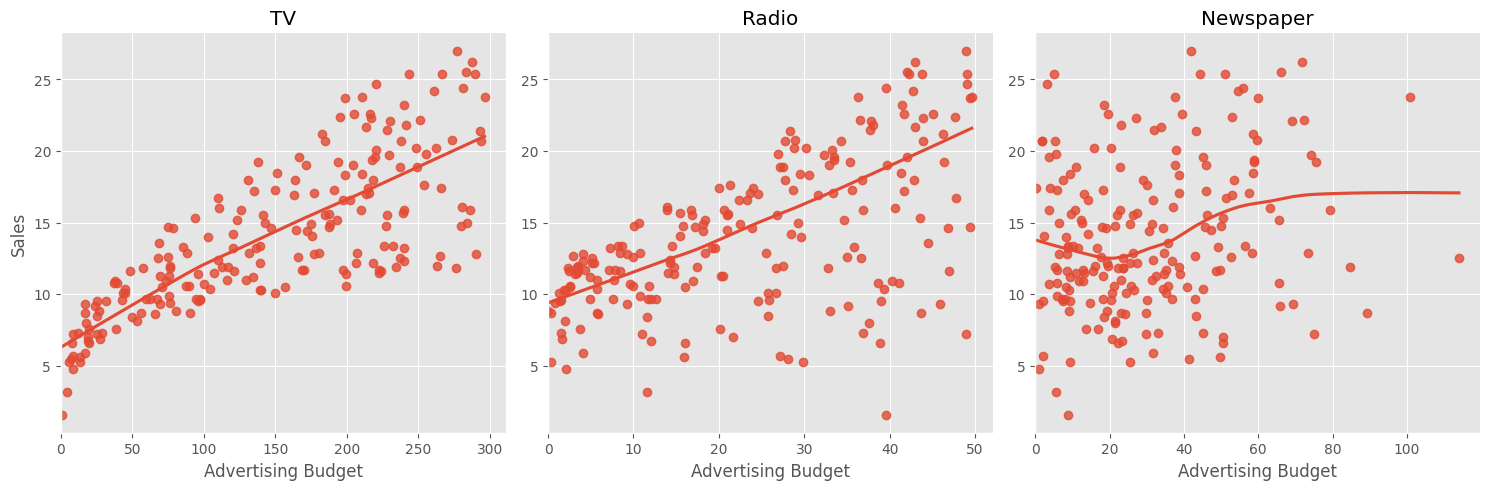

In [ ]:
#sharey=False 和 sharex=False：这些参数表示不共享 y 轴和 x 轴的刻度范围，lowess=True：表示绘制低ess拟合曲线
m = sns.lmplot(x='adv_budget', y='Sales', data=df_adv_new, col='variable', sharey=False, sharex=False, lowess=True);
axes = lm.axes
for i, ax in enumerate(axes[0]):
    ax.set_xlim(0,)
    ax.set_title(lm.col_names[i])
    ax.set_xlabel('Advertising Budget')

# Training Data vs Testing Data
**Training Data** - Data used to build a prediction model. Should not be used to validate the model.  
**Testing Data** - Data used to determine the usefulness of the model. Validates the model. This data is unseen during model building phase.

训练数据 - 用于构建预测模型的数据。不应用于验证模型。


测试数据 - 用于确定模型有用性的数据。验证模型。这些数据在模型构建阶段是看不到的。



In [ ]:
num_points = 30

In [ ]:
np.random.seed(12345)
x = np.linspace(1,13, num_points).reshape(-1, 1)#生成了一个包含了30个在1到13之间等间隔的数字的数组，并将其转换为列向量的形式
error = np.random.randn(num_points, 1) * num_points#生成了一个服从标准正态分布的随机误差，并乘以 num_points，以增加误差的幅度
f = lambda x: (x - 2) * (x - 6) * (x - 12)

y = f(x) + error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=10)#参数 degree=10 指定了多项式的阶数为 10，这意味着会生成包含 x 的 0 次到 10 次幂的所有特征组合
X = poly.fit_transform(x)#调用 poly.fit_transform(x) 方法，对原始特征 x 进行特征扩展，得到了一个新的特征矩阵 X，其中包含了原始特征 x 的所有组合，以及它们的高次幂

In [ ]:
obs_nums = np.arange(0, num_points)#生成了一个包含了 0 到 num_points-1 的数组
np.random.shuffle(obs_nums)#随机打乱了样本的索引

top_70 = int(num_points * .7)#计算了样本数量的 70%
rand_train = np.sort(obs_nums[:top_70])#选择了打乱后的索引中的前 70% 的部分作为训练集，并按照升序排序
rand_test = np.sort(obs_nums[top_70:])#选择了打乱后的索引中的后 30% 的部分作为测试集，并按照升序排序

In [ ]:
#得到了训练集和测试集的特征矩阵和因变量
X_train = X[rand_train]
X_test = X[rand_test]
y_train = y[rand_train]
y_test = y[rand_test]

In [ ]:
linreg = LinearRegression()#创建了一个线性回归模型
linreg.fit(X_train[:, :2], y_train)
y_train_2 = linreg.predict(X_train[:, :2])
y_test_2 = linreg.predict(X_test[:, :2])

linreg.fit(X_train[:, :4], y_train)
y_train_4 = linreg.predict(X_train[:, :4])
y_test_4 = linreg.predict(X_test[:, :4])

linreg.fit(X_train, y_train)
y_train_10 = linreg.predict(X_train)
y_test_10 = linreg.predict(X_test)

In [ ]:
errors_train= np.array([np.mean((y_train - y_train_2) ** 2),
                        np.mean((y_train - y_train_4) ** 2),
                        np.mean((y_train - y_train_10) ** 2)])
errors_train = np.column_stack(([2, 4, 10], errors_train))

errors_test = np.array([np.mean((y_test - y_test_2) ** 2),
                        np.mean((y_test - y_test_4) ** 2),
                        np.mean((y_test - y_test_10) ** 2)])
errors_test = np.column_stack(([2, 4, 10], errors_test))

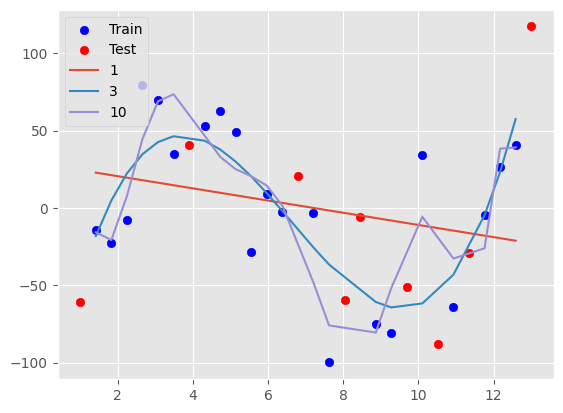

In [ ]:
plt.scatter(X_train[:,1], y_train, c='b', label='Train')
plt.scatter(X_test[:,1], y_test, c='r', label = 'Test')
plt.plot(X_train[:,1], y_train_2, label = '1')
plt.plot(X_train[:,1], y_train_4, label = '3')
plt.plot(X_train[:,1], y_train_10, label = '10')
plt.legend(loc=2);

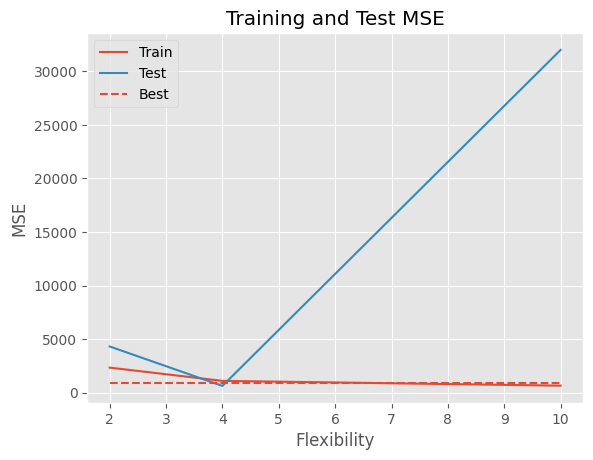

In [ ]:
plt.plot(errors_train[:, 0], errors_train[:, 1], label = 'Train')
plt.plot(errors_test[:, 0], errors_test[:, 1], label = 'Test')
plt.hlines(900, 2, 10, label = 'Best', linestyle = '--')

plt.legend()
plt.title("Training and Test MSE")
plt.xlabel('Flexibility')
plt.ylabel('MSE');

## Problem (advanced)
<span style="color:green">Write a function that a takes a list/array of how many parameters to fit a linear regression model for the above data and outputs the two plots above.</span>

# Exercises

# Problem 3
3a. Hand-picked points to show the 5 curves

手工挑选的点来显示 5 条曲线

In [ ]:
bias = np.array([6, 4, 2, 1, .5, .1])
variance = bias[::-1]
training_error = bias * 1.1
test_error = np.array([7, 5, 2, 2, 5, 7])
irreducible_error = np.ones(6) * 1.5

In [ ]:
df_3 = pd.DataFrame({'bias': bias,
              'variance':variance,
             'training_error': training_error,
             'test_error':test_error,
             'irreducible_error': irreducible_error})

In [ ]:
df_3.plot()
plt.xlabel('Complexity')

# Problem 7

In [ ]:
df_7 = pd.DataFrame({'x1': [0, 2, 0, 0, -1, 1], 'x2':[3, 0, 1, 1, 0, 1], 'x3':[0, 0, 3, 2, 1, 1],
                     'y':['R', 'R', 'R', 'G', 'G', 'R']})
df_7

In [ ]:
# PART a
# Get x1, x2, x3 from the above dataframe. Subtract (0, 0, 0) from it and square each dimension
# 从上面的数据框中获取 x1、x2、x3。从中减去 (0, 0, 0)，然后对每个维度求平方
dist = (df_7.values[:, :3] - np.array([0, 0, 0])) ** 2

# Sum across the rows and make sure the type is float  对行进行求和并确保类型为浮点型
summed_distance = dist.sum(axis=1).astype('float')

# Take square root to get euclidean distance  取平方根得到欧几里得距离
euclidean_dist = np.sqrt(summed_distance)
euclidean_dist

# Problem 8

## Part a and b

In [ ]:
df_college = pd.read_csv('data/college.csv', index_col=0)
df_college.head()

## Part c

In [ ]:
# i
df_college.describe()

In [ ]:
# ii
sns.pairplot(df_college.iloc[:, :10]);

In [ ]:
# iii
sns.boxplot('Private', 'Outstate', data=df_college);

In [ ]:
df_college

In [ ]:
# iv
# Next line produces No/Yes categories based on a boolean(0/1) and saves it as a DataFrame column
# 下一行根据布尔值（0/1）生成否/是类别，并将其保存为 DataFrame 列
df_college['Elite'] = pd.Categorical(np.where(df_college['Top10perc'] > 50, 'Yes', 'No'))
print(df_college['Elite'].value_counts())
sns.boxplot('Elite', 'Outstate', data=df_college);

In [ ]:
# v
fig , ax = plt.subplots(2, 2, figsize=(12,8))
ax[0, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=5)
ax[0, 0].set_title('Percentage Accepted')

ax[0, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=10)
ax[0, 1].set_title('Percentage Accepted')

ax[1, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=15)
ax[1, 0].set_title('Percentage Accepted')

ax[1, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=20)
ax[1, 1].set_title('Percentage Accepted');

In [ ]:
# vi
# Acceptance rate and Graduation rate are negatively correlated
# 录取率和毕业率呈负相关
df_college['Accept_Rate'] = df_college['Accept'] / df_college['Apps']
sns.lmplot('Accept_Rate', 'Grad.Rate', data=df_college);

# Problem 9

In [ ]:
df_auto = pd.read_csv('data/auto.csv')

In [ ]:
df_auto.info()

a) Quantitative vs Qualitative Predictors  
Quantitative - mpg, cylinders, displacement, horsepower, weight, acceleration  
Qualitative - year, origin, name

In [ ]:
# b and c - get the range and std of each quantitative predictor b 和 c - 获取每个定量预测因子的范围和标准差
df_auto.describe()

In [ ]:
# d
pd.concat((df_auto.iloc[:10], df_auto.iloc[85:])).describe()

In [ ]:
# e
# Horsepower and displacement have a very strong postive linear relationship.
# 马力和排量具有非常强的正线性关系。马力和英里/加仑
sns.pairplot(df_auto)

f) Looking at the pair plots above, mpg seems to have some relationship with just about all the other predictors.

# Problem 10

In [ ]:
df_boston = pd.read_csv('data/boston.csv')

In [ ]:
df_boston.shape

This data frame contains the following columns:

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.

此数据框包含以下列：

crim 各城镇的人均犯罪率。

zn 25,000 平方英尺以上地块的住宅用地比例。

indus 每个城镇的非零售商业用地比例。

chas 查尔斯河虚拟变量（如果地块与河流接壤，则为 1；否则为 0）。

nox 氮氧化物浓度（千万分之一）。

rm 每套住宅的平均房间数。

age 1940 年之前建造的自住单元的比例。

dis 到波士顿五个就业中心距离的加权平均值。

rad 径向公路可达性指数。

tax 每 10,000 美元的全值房产税率。

ptratio 各城镇的师生比例。

black 1000(Bk - 0.63)^2 其中，Bk 是各城镇的黑人比例。

lstat 人口地位较低（百分比）。

medv 自住房屋的中位价值，以千美元计。



In [ ]:
# The pair plot is too large. Lets plot correlations and
df_boston.corr()

c) There are no very strong relationships (> .9) with crime. The highest two are **rad**, **tax** and **lstat**. Crime is correlated with density of population (from what I've read before) so rad might be representative of how dense the population is if you are close to highways. Tax rates are generally higher the closer you are to a city center so higher tax rates might imply denser populations. And lower status (lstat) makes sense since more crime is committed by those less well off.

c) 与犯罪没有非常强的关系 (> .9)。最高的两个是 rad、tax 和 lstat。犯罪与人口密度相关（从我之前读到的内容来看），因此如果您靠近高速公路，rad 可能代表人口密度。距离市中心越近，税率通常越高，因此税率越高可能意味着人口密度越高。而较低的地位 (lstat) 是有道理的，因为较不富裕的人犯下的罪行更多。

d) Below are the towns that have a max for each of the predictors. Seems there are some limitation in the data such that 132 towns have exactly 24 as a value for rad and 121 towns have exactly 396.9 as a value for black. Crime also seems to be strangely distributed with nearly all values hovering around 0 and a few serveral orders of magnitude greater.

d) 以下是每个预测因子都有最大值的城镇。数据似乎存在一些限制，例如 132 个城镇的 rad 值恰好为 24，121 个城镇的 black 值恰好为 396.9。犯罪似乎也分布奇怪，几乎所有值都在 0 左右徘徊，并且大几个数量级。

In [ ]:
df_boston.loc[df_boston.idxmax().unique()].style.highlight_max()

In [ ]:
(df_boston['rad'] == 24).sum(), (df_boston['black'] == 396.9).sum()

In [ ]:
plt.hist(df_boston['crim']);

In [ ]:
# e
df_boston['chas'].sum()

In [ ]:
# f
df_boston['ptratio'].median()

In [ ]:
# g
# rad and black are both those suspicious maximum values and crim is a ridiculous outlier. More evidence of bad data
# rad 和 black 都是可疑的最大值，而 crim 是一个荒谬的异常值。更多证据表明数据不准确
df_boston.loc[df_boston['medv'].idxmin()]

In [ ]:
# h
(df_boston['rm'] > 7).sum(), (df_boston['rm'] > 8).sum()

In [ ]:
pd.DataFrame({'More than 8 rooms': df_boston[df_boston['rm'] > 8].describe().loc['50%'],
              '8 or less rooms' : df_boston[df_boston['rm'] <= 8].describe().loc['50%']})

Most of the predictors are the similar in both groups except crime and median value of homes - both about double for more than 8 rooms.

除犯罪率和房屋中位价（对于 8 个以上的房间而言，两者均大约是其两倍）之外，这两组中的大多数预测因素都是相似的。